In [1]:
#!/usr/bin/python

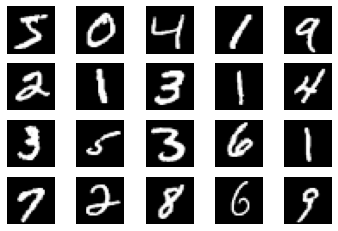

In [1]:
from kernel import *
from features import *
from softmax import *
from svm import *
from linear_regression import *
from utils import *
import sys
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
sys.path.append("..")

###############################################################################
# 1. Load MNIST data:
###############################################################################
train_x, train_y, test_x, test_y = get_MNIST_data()
# Plot the first 20 images of the training set.
plot_images(train_x[0:20, :])

In [2]:
###############################################################################
# 2. Linear Regression with Closed Form Solution
###############################################################################
def run_linear_regression_on_MNIST(lambda_factor=1):
    """
    Trains linear regression, classifies test data, computes test error on test set

    Returns:
        Final test error
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    train_x_bias = np.hstack([np.ones([train_x.shape[0], 1]), train_x])
    test_x_bias = np.hstack([np.ones([test_x.shape[0], 1]), test_x])
    theta = closed_form(train_x_bias, train_y, lambda_factor)
    test_error = compute_test_error_linear(test_x_bias, test_y, theta)
    return test_error

In [3]:
L = np.around(np.linspace(1e-2, 1, 20), decimals=2)
loop = tqdm(enumerate(L), total=len(L))
errors = []
for index, l in loop:
    loop.set_description(f"L{index + 1}={l}")
    e = run_linear_regression_on_MNIST(l)
    errors.append(e)
    loop.set_postfix({'error':e})
print('Linear Regression test errors for different lambdas:')
print(tabulate(np.array([L[:10], errors[:10], L[10:], errors[10:]]).T, headers=(
    'lambda', 'error', 'lambda', 'error')))


Linear Regression test errors for different lambdas:
  lambda    error    lambda    error
--------  -------  --------  -------
    0.01   0.7702      0.53   0.7698
    0.06   0.7699      0.58   0.7697
    0.11   0.7696      0.64   0.7696
    0.17   0.7695      0.69   0.7696
    0.22   0.7696      0.74   0.7696
    0.27   0.7697      0.79   0.7696
    0.32   0.7697      0.84   0.7697
    0.37   0.7697      0.9    0.7697
    0.43   0.7698      0.95   0.7697
    0.48   0.7698      1      0.7697


In [4]:
###############################################################################
# 3. Support Vector Machine (One vs. Rest and Multiclass)
###############################################################################
def run_svm_one_vs_rest_on_MNIST():
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    # Image class = 0 or 1 (if 1-9)
    train_y[train_y != 0] = 1
    test_y[test_y != 0] = 1
    pred_test_y = one_vs_rest_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return np.around(test_error, decimals=3)


print('SVM one vs. rest test error:', run_svm_one_vs_rest_on_MNIST())


def run_multiclass_svm_on_MNIST():
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    pred_test_y = multi_class_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return np.around(test_error, decimals=3)


print('\nMulticlass SVM test error:', run_multiclass_svm_on_MNIST())


SVM one vs. rest test error: 0.007




Multiclass SVM test error: 0.082


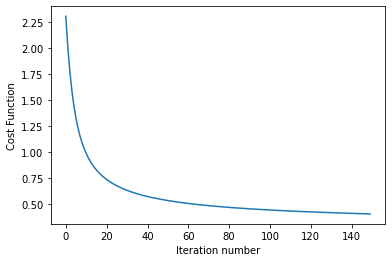



Softmax test error= 0.10050000000000003


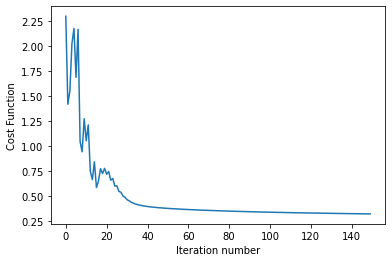

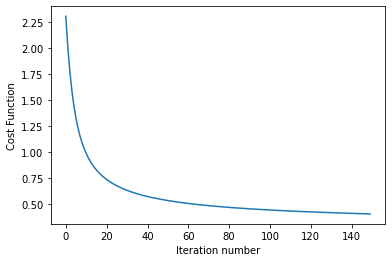

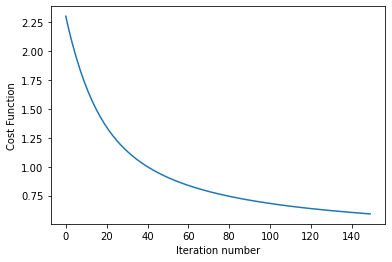


Softmax test errors for different temperature parameters:
  temp    error
------  -------
   0.5   0.084
   1     0.1005
   2     0.1261


In [1]:
from kernel import *
from features import *
from softmax import *
from svm import *
from linear_regression import *
from utils import *
import sys
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
sys.path.append("..")
###############################################################################
# 4. Multinomial (Softmax) Regression and Gradient Descent
###############################################################################
def run_softmax_on_MNIST(temp_parameter=1):
    """
    Trains softmax, classifies test data, computes test error, and plots cost function

    Runs softmax_regression on the MNIST training set and computes the test error using
    the test set. It uses the following values for parameters:
    alpha = 0.3
    lambda = 1e-4
    num_iterations = 150

    Saves the final theta to ./theta.pkl.gz

    Returns:
        Final test error
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    theta, cost_function_history = softmax_regression(
        train_x, train_y, temp_parameter, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)
    plot_cost_function_over_time(cost_function_history)
    test_error = compute_test_error(test_x, test_y, theta, temp_parameter)
    # Save the model parameters theta obtained from calling softmax_regression.
    write_pickle_data(theta, "./theta.pkl.gz")
    return test_error


print('\n\nSoftmax test error=', run_softmax_on_MNIST())
T = [.5, 1.0, 2.0]
temp_parameter = tqdm(T, leave=False, total=3, desc="Temp Parameter loop")
errors = [run_softmax_on_MNIST(t) for t in temp_parameter]
print('\nSoftmax test errors for different temperature parameters:')
print(tabulate(np.array([T, errors]).T, headers=(
    'temp', 'error')))